In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
import numba
from numba import jit

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
def l1_norm(u, u_ref):
    diff = numpy.sum(numpy.abs(u - u_ref))
    return diff

In [5]:
nx, ny = 41, 41
L = 1.0
dx = L / (nx - 1)
dy = L / (ny - 1)

x = numpy.linspace(0, L, num=nx)
y = numpy.linspace(0, L, num=ny)

rtol=1e-6

In [6]:
p0 = numpy.zeros((ny, nx))
w0 = numpy.zeros((ny, nx))

In [8]:
@jit(nopython=True)
def Stokes_2d_jacobi(w0, p0, rtol=1e-6):
    p = p0.copy()
    w = w0.copy()
    diff = rtol + 1.0
    while diff > rtol:
        wn = w.copy()
        pn = p.copy()
        w[1:-1, 1:-1] = 0.25 * (wn[1:-1, :-2] + wn[1:-1, 2:] + 
                                wn[:-2, 1:-1] + wn[2:, 1:-1])
            
            
        p[1:-1, 1:-1] = 0.25 * (pn[1:-1, :-2] + pn[1:-1, 2:] +
                                pn[:-2, 1:-1] + pn[2:, 1:-1] +
                                wn[1:-1, 1:-1] * dx**2)
            
            
        w[-1, 1:-1] = (-1/(2*dy**2)) * (8 * p[-2, 1:-1] - p[-3, 1:-1]) - (3/dy)           
        w[0, 1:-1] = (-1/(2*dy**2)) * (8 * p[1, 1:-1] - p[2, 1:-1])
        w[1:-1, 0] = (-1/(2*dy**2)) * (8 * p[1:-1, 1] - p[1:-1, 2]) 
        w[1:-1, -1] = (-1/(2*dy**2)) * (8 * p[1:-1, -2] - p[1:-1, -3])
        
        
        diff = max( numpy.sum(numpy.abs(p - pn)), numpy.sum(numpy.abs(w - wn)) )
    return p

In [9]:
p = Stokes_2d_jacobi(w0, p0, rtol=1e-6)

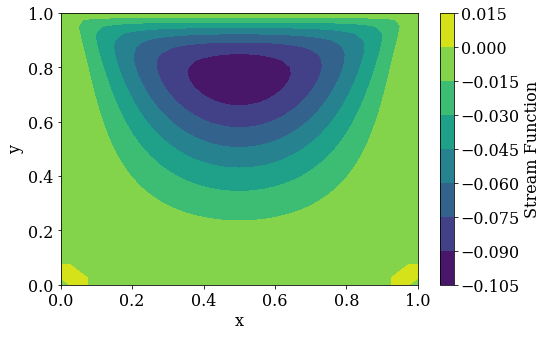

In [21]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x')
pyplot.ylabel('y')
contf = pyplot.contourf(x, y, p)
cbar = pyplot.colorbar(contf)
cbar.set_label('Stream Function');

In [11]:
ind = numpy.unravel_index(abs(p).argmax(), p.shape)
print(p[ind])

-0.09984517246222403


In [12]:
numpy.round(p[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])